<a href="https://colab.research.google.com/github/naveenudhay/clothingclassfication/blob/traditionalneuralnetwork/Clothing_Classfication_using_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Import packages

In [1]:
import tensorflow as tf
import numpy as ny
from tensorflow import keras
import matplotlib.pyplot as plt

Load Fashion MNIST through tf API call

In [7]:
ds = tf.keras.datasets.fashion_mnist
(training_images, training_data),(test_images,test_data) = ds.load_data()

In [8]:
print('Training Data size: {}'.format(len(training_images)))
print('Test Data size: {}'.format(len(test_images)))

Training Data size: 60000
Test Data size: 10000


In [16]:
ny.set_printoptions(linewidth=200)
print(training_images[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17  12  13  70   

In [12]:
class_names = ['Tshirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [17]:
print('Label: '+str(training_data[1]))

Label: 0


In [18]:
print('Class: '+class_names[training_data[1]])

Class: Tshirt


Plotting images

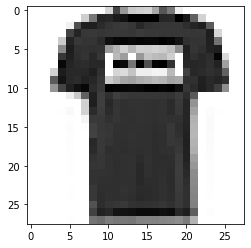

Class: Tshirt


In [20]:
index = 1
plt.figure()
plt.imshow(training_images[index], cmap=plt.cm.binary)
plt.show()
class_index = training_data[index]
print('Class: '+class_names[class_index])

Display multiple images

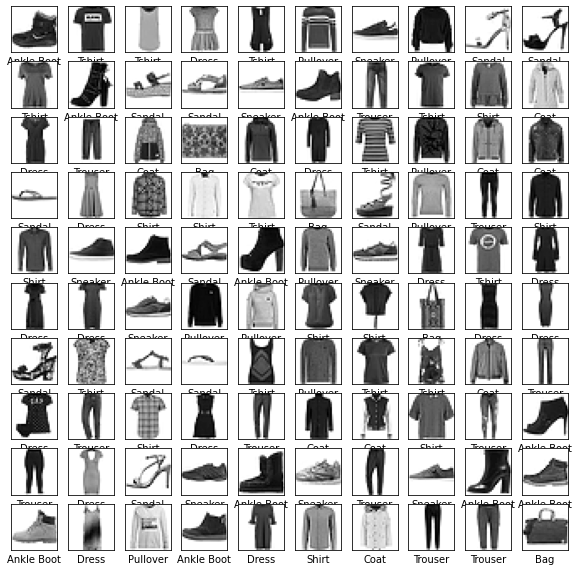

In [23]:
plt.figure(figsize=(10,10))
i = 0
for i in range(100):
  img = training_images[i]
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(img,cmap=plt.cm.binary)
  plt.xlabel(class_names[training_data[i]])
  plt.show


Normalize data

In [24]:
test_images = test_images/255.0
training_images = training_images /255.0

Build model

In [34]:
mod = tf.keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                                  keras.layers.Dense(256, activation='relu'),
                                  keras.layers.Dense(256, activation='relu'),
                                  keras.layers.Dense(10, activation='softmax')])

mod.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Train model

In [35]:
mod.fit(training_images,training_data,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4660 - accuracy: 0.8311
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3559 - accuracy: 0.8700
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3204 - accuracy: 0.8813
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3005 - accuracy: 0.8876
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2801 - accuracy: 0.8948
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2667 - accuracy: 0.8992
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2534 - accuracy: 0.9036
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2427 - accuracy: 0.9091
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2307 - accuracy: 0.9125
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.222

Evaluate the model

In [36]:
mod.evaluate(test_images,test_data)

313/313 [==============================] - 1s 3ms/step - loss: 0.3523 - accuracy: 0.8861


[0.3522586524486542, 0.8860999941825867]

Make predictions

In [46]:
test_index = 1199
test_img = test_images[test_index]
prediction_results = mod.predict(ny.array([test_img]))
print(prediction_results.shape)
print(prediction_results[0])

predicted_index = ny.argmax(prediction_results[0])

print('Predicted index: '+str(predicted_index))
print('Predicted class: '+class_names[predicted_index])

(1, 10)
[2.8056206e-13 3.9565968e-17 9.6641521e-18 5.5238258e-14 4.8099713e-13 1.6856014e-13 5.2719876e-14 6.9768457e-14 1.0000000e+00 1.7951805e-23]
Predicted index: 8
Predicted class: Bag


Actual result

Actual class: Bag


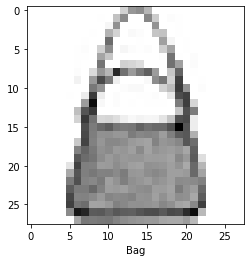

In [47]:
actual_class = test_data[test_index]
print('Actual class: '+class_names[actual_class])
plt.figure()
plt.imshow(test_img,cmap=plt.cm.binary)
plt.xlabel(class_names[actual_class])
plt.show()
